In [1]:
import re
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
import utils.viz as torchviz

In [2]:
x = torch.tensor([[255., 232, 132, 12, 343, 21, 0, 32, 12]]) / 255
y = torch.tensor([1., 0, 0])

In [3]:
w = torch.rand(9, 3, requires_grad=True)
b = torch.rand(1, 3, requires_grad=True)

In [4]:
h = x.mm(w) + b
loss = ((h - y)**2).mean()

# here


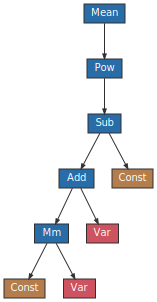

In [5]:
torchviz.draw(loss)

In [6]:
loss.backward()

In [7]:
print(w.grad, '\n', b.grad)

tensor([[1.3103, 0.9271, 1.6677],
        [1.1921, 0.8435, 1.5172],
        [0.6783, 0.4799, 0.8633],
        [0.0617, 0.0436, 0.0785],
        [1.7625, 1.2471, 2.2432],
        [0.1079, 0.0764, 0.1373],
        [0.0000, 0.0000, 0.0000],
        [0.1644, 0.1163, 0.2093],
        [0.0617, 0.0436, 0.0785]]) 
 tensor([[1.3103, 0.9271, 1.6677]])


# Linear

In [8]:
class LinearModel(nn.Module):
    def __init__(self, x, y):
        super(LinearModel, self).__init__()
        self.layer1 = nn.Linear(x, y)

    def forward(self, x):
        x = self.layer1(x)
        return F.softmax(x, dim=1)

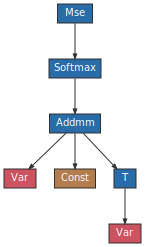

In [9]:
model = LinearModel(9, 3)
cost = nn.MSELoss()
pred = model(x)
loss = cost(pred, y.view(1, -1))
torchviz.draw(loss)

# Neural Networks

In [10]:
class NeuralNework(nn.Module):
    def __init__(self, x, y):
        super(NeuralNework, self).__init__()
        hidden = int(x/2)
        self.layer1 = nn.Linear(x, hidden)
        self.layer2 = nn.Linear(hidden, hidden)
        self.output = nn.Linear(hidden, y)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output(x)
        return F.softmax(x, dim=1)

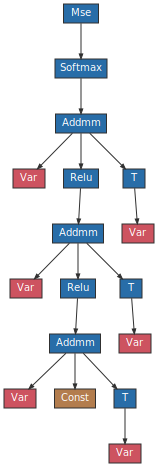

In [11]:
model = NeuralNework(9, 3)
cost = nn.MSELoss()
pred = model(x)
loss = cost(pred, y.view(1, -1))
torchviz.draw(loss)

# Convolutional Neural Network

In [12]:
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms

digits = datasets.MNIST('data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Lambda(lambda x: x.view(28*28))
                    ]),
                    target_transform=transforms.Compose([
                        transforms.Lambda(lambda y: 
                                          torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
                    ])
                 )

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x, dim=1)

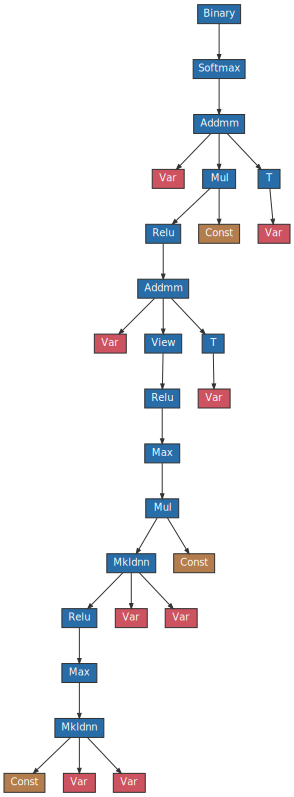

In [14]:
model = CNN()
cost = torch.nn.BCELoss()
pred = model(digits[0][0])
loss = cost(pred, digits[0][1].view(1, -1))
torchviz.draw(loss)